In [1]:
library(arules)
library(arulesViz)
library(plotly)

Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: ggplot2

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [2]:
transaksi <- read.transactions(file = "Data_Transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

## Menghasilkan Rules dengan Parameter Support dan Confidence
Pada bab sebelumnya, kita menghasilkan tiga rules dengan function apriori secara default tanpa parameter apapun. 

Padahal sebenarnya kita bisa memasukkan parameter tambahan berupa support dan confidence.

Tanpa parameter tambahan tersebut, maka nilai minimum support adalah 0.1 dan minimum confidence adalah 0.8 sebagai filter dari function apriori.

Berikut adalah perintah untuk menghasilkan kembali association rules dengan function apriori, tapi kali ini dengan tambahan parameter minimum support dan confidence masing-masing bernilai 0.1 dan 0.5.

    apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

In [3]:
# Membuat Rules disini berbeda dari sebelumnya karena memakai nilai minimum support dan confidence
# Jadi rules yang dihasilkan ada 16
# apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

# Simpan rules ke MDA
mda <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


## Inspeksi Rules Yang Dihasilkan
Dengan pengetahuan kita dari bab sebelumnya, menggunakan function kita bisa menggali informasi detil dari rules dengan inspect.

Tugas Praktek

Tambahkan perintah pada code editor untuk menyimpan association rules ke dalam variable mba dan tampilkan isinya dengan function inspect.

Jika semua berjalan lancar, hasilnya akan terlihat sebagai berikut.

         lhs                     rhs         support confidence lift      
    [1]  {}                   => {Pet Food}  0.5     0.5000000  1.0000000     
    [2]  {}                   => {Sirup}     0.6     0.6000000  1.0000000     
    [3]  {}                   => {Teh Celup} 0.8     0.8000000  1.0000000     
    [4]  {Gula}               => {Sirup}     0.2     0.5000000  0.8333333     
    [5]  {Gula}               => {Teh Celup} 0.3     0.7500000  0.9375000     
    [6]  {Pet Food}           => {Sirup}     0.4     0.8000000  1.3333333     
    [7]  {Sirup}              => {Pet Food}  0.4     0.6666667  1.3333333     
    [8]  {Pet Food}           => {Teh Celup} 0.3     0.6000000  0.7500000     
    [9]  {Sirup}              => {Teh Celup} 0.4     0.6666667  0.8333333     
    [10] {Teh Celup}          => {Sirup}     0.4     0.5000000  0.8333333     
    [11] {Gula,Pet Food}      => {Sirup}     0.1     1.0000000  1.6666667     
    [12] {Gula,Sirup}         => {Pet Food}  0.1     0.5000000  1.0000000     
    [13] {Gula,Sirup}         => {Teh Celup} 0.1     0.5000000  0.6250000     
    [14] {Pet Food,Sirup}     => {Teh Celup} 0.2     0.5000000  0.6250000     
    [15] {Pet Food,Teh Celup} => {Sirup}     0.2     0.6666667  1.1111111     
    [16] {Sirup,Teh Celup}    => {Pet Food}  0.2     0.5000000  1.0000000 

Terlihat dengan merubah parameter pada function apriori, kita mendapatkan jumlah rules yang berbeda.


In [4]:
inspect(mda)

     lhs                     rhs         support confidence coverage lift     
[1]  {}                   => {Pet Food}  0.5     0.5000000  1.0      1.0000000
[2]  {}                   => {Sirup}     0.6     0.6000000  1.0      1.0000000
[3]  {}                   => {Teh Celup} 0.8     0.8000000  1.0      1.0000000
[4]  {Gula}               => {Sirup}     0.2     0.5000000  0.4      0.8333333
[5]  {Gula}               => {Teh Celup} 0.3     0.7500000  0.4      0.9375000
[6]  {Pet Food}           => {Sirup}     0.4     0.8000000  0.5      1.3333333
[7]  {Sirup}              => {Pet Food}  0.4     0.6666667  0.6      1.3333333
[8]  {Pet Food}           => {Teh Celup} 0.3     0.6000000  0.5      0.7500000
[9]  {Sirup}              => {Teh Celup} 0.4     0.6666667  0.6      0.8333333
[10] {Teh Celup}          => {Sirup}     0.4     0.5000000  0.8      0.8333333
[11] {Gula,Pet Food}      => {Sirup}     0.1     1.0000000  0.1      1.6666667
[12] {Gula,Sirup}         => {Pet Food}  0.1     0.5

## Filter berdasarkan Lift

Kita bisa melakukan filter terhadap metrik kualitas dari association rules: support, confidence dan lift dengan function subset. Function yang sama untuk melakukan filter terhadap lhs dan rhs.

Bedanya adalah karena angka, maka untuk ketiga metrik tersebut kita gunakan operator perbandingan angka.
Sebagai contoh, untuk melakukan filter terhadap objek mba dengan kondisi berikut:

    •	lhs atau rhs memiliki Teh Celup
    •	lift di atas 1
maka perintahnya adalah sebagai berikut

    subset(mba, (lhs %in% "Teh Celup" | rhs %in% "Teh Celup") & lift>1)

Perhatikan untuk ekspresi lhs dan rhs ditutup dengan kurung sebelum digabungkan dengan kondisi lift.

Hanya terdapat 1 rule sebagai hasil filter dan paket produk ini cukup menjanjikan, dimana Teh Celup menjadi komponen dari itemset di lhs.

In [5]:
# lalu inspect dengan filter rhs dan lhs disini item nya teh celup, note | : Atau
# Tambahkan lagi filter lift nya harus diatas 1
inspect(subset(mda, (lhs %in% "Teh Celup" | rhs %in% "Teh Celup") & lift > 1))

    lhs                     rhs     support confidence coverage lift     count
[1] {Pet Food,Teh Celup} => {Sirup} 0.2     0.6666667  0.3      1.111111 2    


## Rekomendasi - Filter dengan %ain%
Operator %in% yang sebelumnya kita gunakan sudah efektif. Namun operator ini tidak cocok jika kita ingin melakukan filter itemset dengan logika AND. Artinya seluruh item harus muncul dalam itemset yang terpilih. Untuk keperluan tersebut, gunakan operator %ain%.

Contoh subset yang menggunakan %ain% adalah sebagai berikut.

    subset(mba, (lhs %ain% c("Pet Food", "Gula" )))

Dan ekspresi inilah menjadi kunci untuk membuat rekomendasi.

Hanya terdapat 1 rule sebagai hasil filter, dan dengan lift di atas 1 dan support 0.1 (10%) rule ini bisa dianggap layak untuk meghasilkan rekomendasi item, yaitu Sirup.
Jadi orang yang membeli Gula dan Pet Food, bisa ditawarin Sirup.


In [6]:
# Filter dengan %ain%, Filter ini tidak cocok jika kita ingin melakukan filter itemset dengan logika AND
# Artinya seluruh item harus muncul dalam itemset yang terpilih untuk keperluah tersebut

inspect(subset(mda, (lhs %ain% c("Pet Food", "Gula"))))

    lhs                rhs     support confidence coverage lift     count
[1] {Gula,Pet Food} => {Sirup} 0.1     1          0.1      1.666667 1    


## Visualisasi Rules dengan Graph
Sejauh ini Anda telah menghasilkan rules dan mengerti bagaimana metrik kualitas dapat digunakan sebagai basis pemilihan rule.

Namun ketika item semakin banyak, maka proses memilih berdasarkan angka-angka saja cukup merepotkan. Kadangkala visualisasi bisa sangat membantu analisa di proses ini.

Jenis visualisasi cukup banyak, namun kita akan gunakan visualisasi bertipe graph yang terdapat pada package arulesViz – suatu package dengan visualisasi khusus untuk association rules.

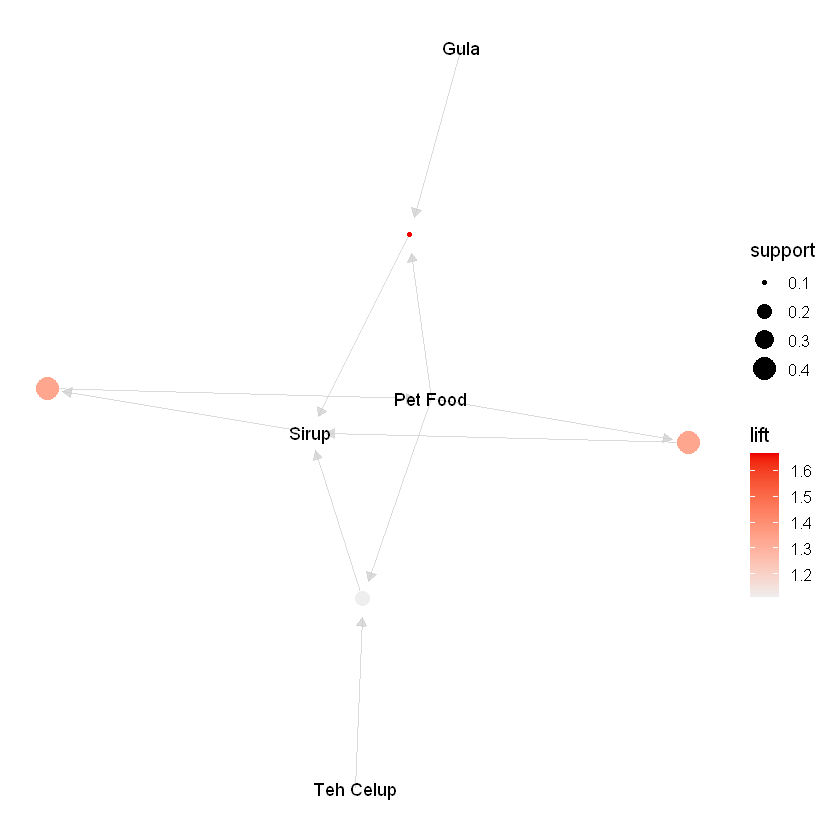

In [7]:
# Visualisaskan dengan graph
plot(subset(mda, lift > 1,1), method="graph")

Lingkaran disini adalah titik pertemuan (asosiasi) dari item-item yang ada, dimana terdapat tanda panah sebagai garis penghubungnya. Tiap Item disini berupa teks.

Besarnya bulatan menunjukkan popularitas, dan intensitas warna menunjukkan lift. Terlihat disini Gula ke Sirup, dan Pet Food ke Sirup memiliki lift yang relatif tinggi tapi supportnya tidak terlalu besar.


## Kesimpulan

Dengan rangkaian praktek yang telah kita lakukan sejauh ini, Anda telah menyelesaikan dasar penggunaan algoritma apriori untuk membantu di bidang retail.

Sepanjang course ini kita telah mendapatkan beberapa keterampilan hal berikut:

    •	persiapan data transaksi, dengan membaca file dalam bentuk csv dalam format data.frame dan transaction.
    •	menganalisa statistik yang terkait dengan item dan itemset.
    •	menghasilkan rule dan mencari itemset terbaik di rule - ini menjadi model untuk paket produk yang baik.

Tiga keterampilan penting ini siap menjadi modal Anda sebagai data scientist untuk berkontribusi meningkatkan omset penjualan di perusahaan ritel.
